In [1]:
using Pkg; Pkg.activate(".")
using HypergraphModularity

using Random
using PyPlot

 Activating environment at `~/codes/hypergraph_modularities_code/Project.toml`


In [2]:
identity(p::Vector{Int64}) = p

function sum_of_ext_degs(p::Vector{Int64})
    soed = length(p) - 1
    return (sum(p), soed)
end

function all_or_nothing(p::Vector{Int64})
    is_aon = length(p) == 1
    return (sum(p), is_aon)
end

function all_or_nothing2(p::Vector{Int64})
    return is_aon
end

function rainbow(p::Vector{Int64})
    is_rainbow = length(p) == sum(p) && length(p) > 1
    return (sum(p), is_rainbow)
end

function all_or_nothing2(p::Vector{Int64})
    return length(p) == 1
end

all_or_nothing2 (generic function with 1 method)

In [3]:
function ll_ratios(Hyp, Z, agg, num_trials::Int64=100)
    function MLE_ll(Z1)
        Ω̂ = estimateΩEmpirically(Hyp, Z1; min_val=0, aggregator=agg)
        return Float64(sum(L(Hyp, Z1, Ω̂; α=0, bigInt=true)))    
    end
    data_ll = MLE_ll(Z)
    rand_ll = Float64[]
    for _ = 1:num_trials
        push!(rand_ll, MLE_ll(shuffle(Z)))
    end
    
    return data_ll, rand_ll
end

ll_ratios (generic function with 2 methods)

In [4]:
#H, labels = read_hypergraph_data("contact-primary-school", 10)
#data_ll, rand_ll = ll_ratios(H, labels, all_or_nothing2, 500)
#data_ll .- rand_ll

In [5]:
#H, labels = read_hypergraph_data("walmart-trips", 10)
#data_ll, rand_ll = ll_ratios(H, labels, all_or_nothing2, 100)
#data_ll .- rand_ll

In [6]:
# Are cities or countries better communities for TrivagoClickout ?

for k = 3:15
    H1, labels1 = read_hypergraph_data("TrivagoClickout", k)
    Ω̂ = estimateΩEmpirically(H1, labels1; min_val=0, 
                              aggregator=all_or_nothing)
    ll1 = sum(logLikelihood(H1, labels1, Ω̂; α=0, bigInt=true))

    H2, labels2 = read_hypergraph_data("TrivagoClickout-cities", k)
    Ω̂ = estimateΩEmpirically(H2, labels2; min_val=0, 
                              aggregator=all_or_nothing)
    ll2 = sum(logLikelihood(H2, labels2, Ω̂; α=0, bigInt=true))

    diff = Float64(ll1 - ll2)
    println("$k $diff")
end

3 3.4343143463912965e13
4 1.3849971138569043e13
5 8.332846923148879e14
6 3.827595187628312e16
7 3.516821165525935e16
8 1.0992833988891296e18
9 3.984199970197471e19
10 1.318350710847023e21
11 5.521088495610445e22
12 2.2864224903242258e24
13 1.0685640774841664e26
14 2.3226040306471357e27
15 2.551968116592803e28


In [7]:
function MLE_ll(Hyp, Z, agg)
    Ω̂ = estimateΩEmpirically(Hyp, Z; min_val=0, aggregator=agg)
    return Float64(sum(logLikelihood(Hyp, Z, Ω̂; α=0, bigInt=true)))    
end

function dyadic_MLE_ll(Hyp, Z, weighted::Bool)
    ω_in, ω_out = 
        computeDyadicResolutionParameter(Hyp, Z; mode="ω", weighted=weighted)
    return Float64(dyadicLogLikelihood(Hyp, Z, ω_in, ω_out; weighted=weighted))
end

dyadic_MLE_ll (generic function with 1 method)

In [8]:
for k = 3:6
    H, labels1 = read_hypergraph_data("TrivagoClickout", k)
    _, labels2 = read_hypergraph_data("TrivagoClickout-cities", k)


    println("max size = $k...")
    println("Polyadic MLE LL (countries): ", 
            MLE_ll(H, labels1, all_or_nothing2))
    println("Polyadic MLE LL (cities): ", 
            MLE_ll(H, labels2, all_or_nothing2))
    println("")

    println("Weighted Dyadic MLE LL (countries): ",     
            dyadic_MLE_ll(H, labels1, true))
    println("Weighted Dyadic MLE LL (cities): ",     
            dyadic_MLE_ll(H, labels2, true))
    println("")

    println("Unweighted Dyadic MLE LL (countries): ",     
            dyadic_MLE_ll(H, labels1, false))
    println("Unweighted Dyadic MLE LL (cities): ",     
            dyadic_MLE_ll(H, labels2, false))    
    
    println("")
end

max size = 3...
Polyadic MLE LL (countries): -1.3568423896155264e7
Polyadic MLE LL (cities): -3.4256925928936613e13

Weighted Dyadic MLE LL (countries): 217817.93037495133
Weighted Dyadic MLE LL (cities): 428356.58985367103

Unweighted Dyadic MLE LL (countries): 435635.86074990267
Unweighted Dyadic MLE LL (cities): 856713.1797073421

max size = 4...
Polyadic MLE LL (countries): -1.2853627525861788e8
Polyadic MLE LL (cities): -3.796120655112838e13

Weighted Dyadic MLE LL (countries): 371530.53053178673
Weighted Dyadic MLE LL (cities): 729415.9783523383

Unweighted Dyadic MLE LL (countries): 896696.1271872225
Unweighted Dyadic MLE LL (cities): 1.7596396213220414e6

max size = 5...
Polyadic MLE LL (countries): -4.760042268306369e7
Polyadic MLE LL (cities): -5.02980773911707e15

Weighted Dyadic MLE LL (countries): 468684.8256706544
Weighted Dyadic MLE LL (cities): 910718.1352905163

Unweighted Dyadic MLE LL (countries): 1.2850037871287023e6
Unweighted Dyadic MLE LL (cities): 2.484795178200

In [9]:
H, Z1 = read_hypergraph_data("TrivagoClickout", 3)
_, Z2 = read_hypergraph_data("TrivagoClickout-cities", 3)
ω_in1, ω_out1 = computeDyadicResolutionParameter(H, Z1; mode="ω", weighted=false)
ω_in2, ω_out2 = computeDyadicResolutionParameter(H, Z2; mode="ω", weighted=false)
γ_opt1 = (ω_in1 - ω_out1) / (log(ω_in1) - log(ω_out1))
γ_opt2 = (ω_in2 - ω_out2) / (log(ω_in2) - log(ω_out2))
Q_opt1 = dyadicModularity(H, Z1, γ_opt1; weighted=false)
Q_opt2 = dyadicModularity(H, Z2, γ_opt2; weighted=false)
Q_opt1, Q_opt2

(0.8359094805803354, 0.6864728799431797)

In [10]:
Qs = []
γs = 1:50
for γ in γs
    push!(Qs, dyadicModularity(H, Z2, γ; weighted=false))
end

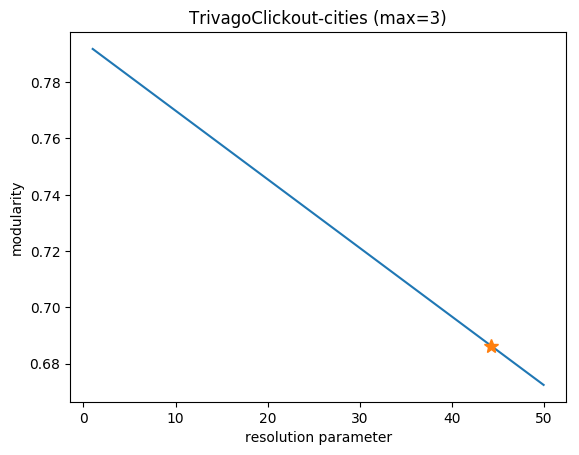

In [11]:
plot(γs, Qs)
plot(γ_opt2, Q_opt2, marker="*", ms=10, label="optimal")
title("TrivagoClickout-cities (max=3)")
xlabel("resolution parameter")
ylabel("modularity")
savefig("trivago-modularity.png")

In [12]:
lls = []
ω_ins = 250:10:400
for ω_in in ω_ins
    ll = Float64(dyadicLogLikelihood(H, Z2, ω_in, ω_out2; weighted=false))
    push!(lls, ll)
end

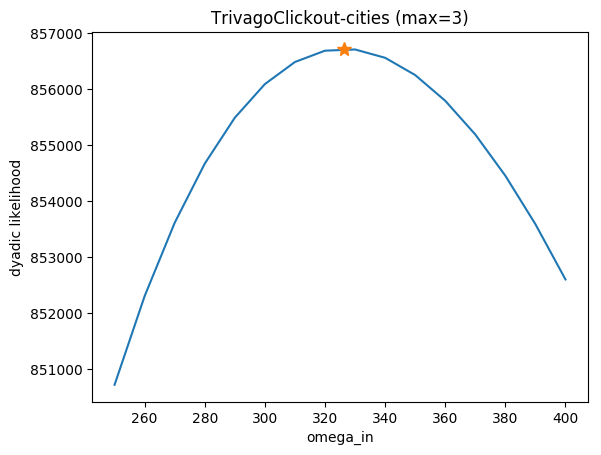

In [13]:
ll_opt = Float64(dyadicLogLikelihood(H, Z2, ω_in2, ω_out2; weighted=false))
plot(ω_ins, lls)
plot(ω_in2, ll_opt, marker="*", ms=10, label="optimal")
title("TrivagoClickout-cities (max=3)")
xlabel("omega_in")
ylabel("dyadic likelihood")
savefig("trivago-likelihood.png")